In [1]:
import numpy as np
import matplotlib.pyplot as plt

# trueData = np.load('trueDataNL.npy').T # non linear
# xposGPS = np.load('xGPSNL.npy')
#xspeedGPS = np.load('xspeedGPS.npy')

trueData = np.load('trueDataLinear.npy') # linear
xposGPS = np.load('xGPSLinear.npy')

In [2]:
# Kalman Filter Implementation
#
# P, Q, and R are covariance matrices representing process and measurement noise respectively
# P = State estimation error covariance (uncertainty in our state estimate)
# R = Measurement noise covariance (uncertainty in our sensors/measurements)
# Q = Process noise covariance (uncertainty in system model/dynamics)
# H is the measurement matrix ([1,0]) if we are only measuring position, [0,1] if we are only measuring velocity
# u,v are process and measurement noise respectively (mean = 0, covariance = P and Q)
# K = Kalman Gain (used to update the state estimate based on the measurement. Different for position and velocity)
# 


dt = 1 # delta time
hpa = 100 # vertical position accuracy

# Underlying Dynamical System 
Ax = np.array([[1, dt], [0, 1]]) # [[1, dt],[0, 1]]
P = np.array([[1, 0], [0, 1]])
ux = np.random.normal(0,P)


# Measurement that we get:
H = np.array([[1, 0]]) # Measurement matrix (just tracking position)
Q = np.array([[0.25, 0.5], [0.5, 1.0]])
vx = np.random.normal(0,Q) 

# Prediction step

# Covariance Matrix
# (1,1): uncertainty you have of the position of the car
# (2,2): uncertainty you have of the velocity of the car
# (2,1) = (1,2): the correlation between noise in measurements to the speed / position of the car
R = np.array([[hpa]])

# Iterate through measurements
I = np.identity(2, dtype=int)
xstate = np.array([[xposGPS[0]], [0]])
xstate_history = []
for i in range(len(xposGPS)):

    # Predict
    x_predict = Ax @ xstate
    P_predict = Ax @ P @ Ax.T + Q
    
    # Update
    K_position = P_predict[0,0] / (P_predict[0,0] + R[0,0])
    xpos_update = x_predict[0,0] + K_position * (xposGPS[i] - x_predict[0,0])

    Kspeed = P_predict[1,0] / (P_predict[0,0] + R[0,0])
    xspeed_update = x_predict[1,0] + Kspeed * (xposGPS[i] - x_predict[0,0])

    K = np.array([[K_position], [Kspeed]])
    P = (I - K @ H) @ P_predict

    if i % 5 == 0:
        print(f"K_position = {K_position:.3f}") # Getting a value of 0.36: 36% trust in GPS measurements, 64% trust in prediction


    xstate = np.array([[xpos_update], [xspeed_update]])
    xstate_history.append(xstate.copy())

xstate_history = np.reshape(xstate_history, (len(xstate_history), 2))


K_position = 0.022
K_position = 0.334
K_position = 0.355
K_position = 0.359
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360
K_position = 0.360


In [3]:
np.shape(trueData)

(100, 2)

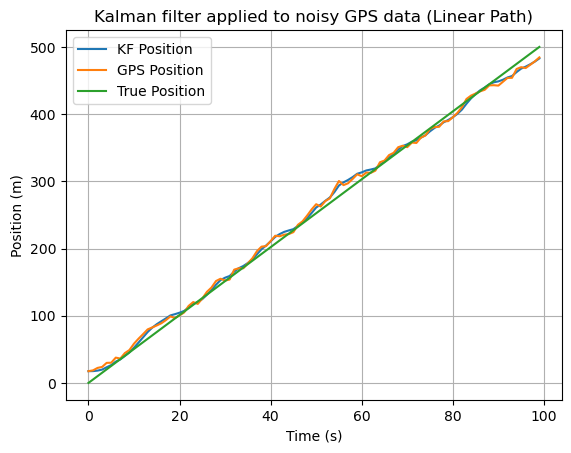

In [4]:
# Part 1 - Linear Path(FOGM)
plt.figure(1)
plt.plot(xstate_history[:, 0], label='KF Position')
plt.plot(xposGPS, label='GPS Position')
plt.plot(trueData[:, 0], label='True Position')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f'Kalman filter applied to noisy GPS data (Linear Path)')
plt.grid(True)
plt.show()


# Part 2 - Nonlinear Path(FOGM2)
# plt.figure(1)
# plt.plot(xstate_history[:, 0], label='KF Position')
# plt.plot(xposGPS, label='GPS Position')
# plt.plot(trueData[:, 0], label='True Position')
# plt.legend()
# plt.xlabel('Time (s)')
# plt.ylabel('Position (m)')
# plt.title(f'Kalman filter applied to noisy GPS data (Nonlinear Path)')
# plt.grid(True)
# plt.show()



